In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
nagoyadf = pd.read_csv("hxb2/counts_Japan.tsv", sep='\t')
# brazildf = pd.read_csv("hxb2/counts_Brazil.tsv", sep='\t')
nicaraguadf = pd.read_csv("hxb2/counts_Nicaragua.tsv", sep='\t')
phdf = pd.read_csv("hxb2/counts_Philippines.tsv", sep='\t')

# reads_hxb2 = pd.concat([nagoyadf, nicaraguadf, phdf, brazildf])
reads_hxb2 = pd.concat([nagoyadf, nicaraguadf, phdf])
# reads_hxb2.head()

In [144]:
headers = ["incorrect", "correct", "sample_id", "aligner", "country"]
phdf = pd.read_csv("hxb2/plot_alns_Philippines.tsv", sep='\t', names=headers, header=None)
# brazildf = pd.read_csv("hxb2/plot_alns_Brazil.tsv", sep='\t', names=headers, header=None)
nagoyadf = pd.read_csv("hxb2/plot_alns_Japan.tsv", sep='\t', names=headers, header=None)
nicaraguadf = pd.read_csv("hxb2/plot_alns_Nicaragua.tsv", sep='\t', names=headers, header=None)

# correct_hxb2 = pd.concat([phdf, nagoyadf, nicaraguadf, brazildf])
correct_hxb2 = pd.concat([phdf, nagoyadf, nicaraguadf])
correct_hxb2['reference'] = "hxb2"

correct_hxb2.loc[correct_hxb2['aligner'] == "bowtie2", 'aligner'] = "Bowtie2"
correct_hxb2.loc[correct_hxb2['aligner'] == "last", 'aligner'] = "LAST"
correct_hxb2.loc[correct_hxb2['aligner'] == "last trained", 'aligner'] = "LAST (trained)"

# correct_hxb2.head()

In [145]:
nagoyadf = pd.read_csv("new_ref/counts_Japan.tsv", sep='\t')
# brazildf = pd.read_csv("new_ref/counts_Brazil.tsv", sep='\t')
nicaraguadf = pd.read_csv("new_ref/counts_Nicaragua.tsv", sep='\t')
phdf = pd.read_csv("new_ref/counts_Philippines.tsv", sep='\t')

# reads_new = pd.concat([nagoyadf, nicaraguadf, phdf, brazildf])
reads_new = pd.concat([nagoyadf, nicaraguadf, phdf])
reads_new.head()

,Country,Sample ID,Total Mapped,Total Unmapped,Total Reads,Alignment Percentage,aligner
0,Japan,DRR030219,548429,6287,554716,98.867,LAST
1,Japan,DRR030221,486977,17471,504448,96.537,LAST
2,Japan,DRR030222,568746,18480,587226,96.853,LAST
3,Japan,DRR030219,551771,2945,554716,99.469,LAST (trained)
4,Japan,DRR030221,491614,12834,504448,97.456,LAST (trained)


In [146]:
phdf = pd.read_csv("new_ref/plot_alns_Philippines.tsv", sep='\t', names=headers, header=None)
# brazildf = pd.read_csv("new_ref/plot_alns_Brazil.tsv", sep='\t', names=headers, header=None)
nagoyadf = pd.read_csv("new_ref/plot_alns_Japan.tsv", sep='\t', names=headers, header=None)
nicaraguadf = pd.read_csv("new_ref/plot_alns_Nicaragua.tsv", sep='\t', names=headers, header=None)

# correct_new = pd.concat([nagoyadf, nicaraguadf, phdf, brazildf])
correct_new = pd.concat([nagoyadf, nicaraguadf, phdf])
correct_new['reference'] = "new"
correct_new['sample_id'] = correct_new['sample_id'].str.split('_').str[0]

correct_new.loc[correct_new['aligner'] == "bowtie2", 'aligner'] = "Bowtie2"
correct_new.loc[correct_new['aligner'] == "last", 'aligner'] = "LAST"
correct_new.loc[correct_new['aligner'] == "last trained", 'aligner'] = "LAST (trained)"

correct_new.head()

,incorrect,correct,sample_id,aligner,country,reference
0,0.247872,0.752128,DRR030219,LAST,Japan,new
1,0.119148,0.880852,DRR030219,LAST (trained),Japan,new
2,0.191277,0.808723,DRR030219,Bowtie2,Japan,new
3,0.245988,0.754012,DRR030221,LAST,Japan,new
4,0.094454,0.905546,DRR030221,LAST (trained),Japan,new


In [147]:
a = pd.merge(correct_hxb2, reads_hxb2, left_on=['sample_id', 'aligner'], right_on=['Sample ID', 'aligner'])
b = pd.merge(correct_new, reads_new, left_on=['sample_id', 'aligner'], right_on=['Sample ID', 'aligner'])

a['alignment_ratio'] = a['Alignment Percentage'] / 100.0
b['alignment_ratio'] = b['Alignment Percentage'] / 100.0

merged = pd.concat([a, b])
merged['alignment_ratio'] = merged['Alignment Percentage'] / 100.0
merged.head()


,incorrect,correct,sample_id,aligner,country,reference,Country,Sample ID,Total Mapped,Total Unmapped,Total Reads,Alignment Percentage,alignment_ratio
0,0.323054,0.676946,HIV2-157,LAST,Philippines,hxb2,Philippines,HIV2-157,1576988,423012,2000000,78.849,0.78849
1,0.165794,0.834206,HIV2-157,LAST (trained),Philippines,hxb2,Philippines,HIV2-157,1600280,399720,2000000,80.014,0.80014
2,0.432367,0.567633,HIV2-157,Bowtie2,Philippines,hxb2,Philippines,HIV2-157,913315,1086685,2000000,45.666,0.45666
3,0.447775,0.552225,HIV2-174,LAST,Philippines,hxb2,Philippines,HIV2-174,1611157,388843,2000000,80.558,0.80558
4,0.282140,0.717860,HIV2-174,LAST (trained),Philippines,hxb2,Philippines,HIV2-174,1754995,245005,2000000,87.750,0.87750


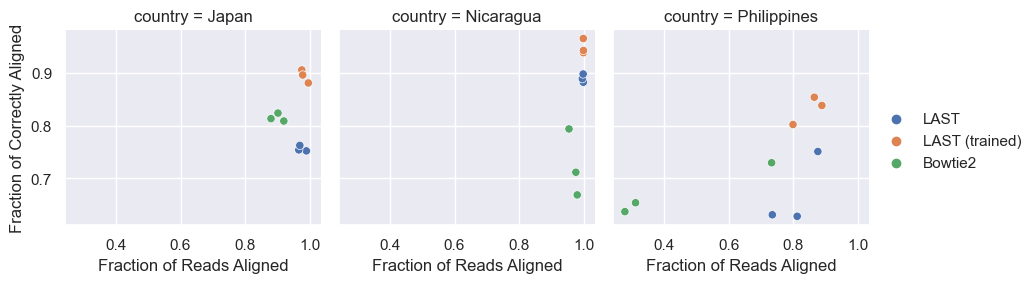

In [151]:
# a scatter/dot- plot: fraction of reads aligned on x-axis, and fraction of correct alignments on y-axis. 
# colored by country.

# TO DO: multiply correct by 100

g = sns.FacetGrid(a, col='country')

g.map(sns.scatterplot, 'alignment_ratio', 'correct', 'aligner')
g.set_axis_labels('Fraction of Reads Aligned', 'Fraction of Correctly Aligned')
g.add_legend()

plt.show()

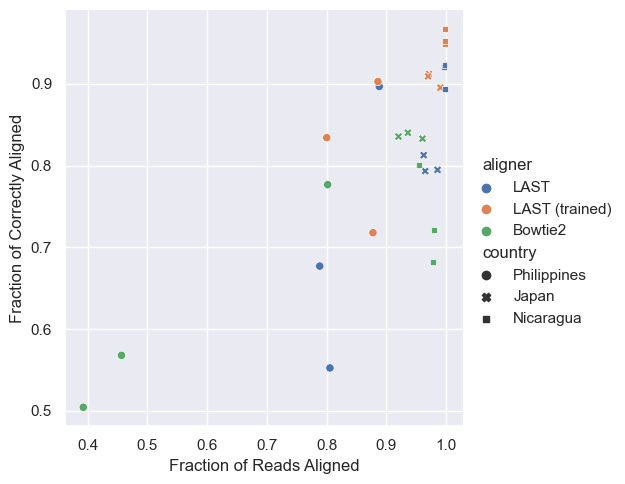

In [150]:
sns.set_theme()
sns.relplot(data=a, x='alignment_ratio', y='correct', hue='aligner', style='country')
# plt.add_label('', '')
plt.xlabel("Fraction of Reads Aligned")
plt.ylabel("Fraction of Correctly Aligned")

plt.show()